In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/ecg.csv'
df = pd.read_csv(dataset_path)

In [6]:
df.shape

(4997, 141)

In [7]:
df.head(4997)

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [9]:
# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [18]:
X_train.shape

(3497, 140)

In [19]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Reshape data to fit into the CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
#For 1D data like ECG data, CNNs expect data with the shape (number_of_samples, number_of_features, number_of_channels).

In [22]:
X_test.shape

(1500, 140, 1)

In [23]:
X_train.shape



(3497, 140, 1)

In [24]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 138, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 69, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 67, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 33, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 256)           98560     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 15, 256)           0

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
77/77 [==============================] - 5s 36ms/step - loss: 0.1559 - accuracy: 0.9628 - val_loss: 0.0583 - val_accuracy: 0.9848
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0672 - accuracy: 0.9832 - val_loss: 0.0560 - val_accuracy: 0.9819
Epoch 3/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0385 - accuracy: 0.9914 - val_loss: 0.0457 - val_accuracy: 0.9886
Epoch 4/100
77/77 [==============================] - 3s 34ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0577 - val_accuracy: 0.9848
Epoch 5/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0279 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9895
Epoch 6/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0365 - val_accuracy: 0.9914
Epoch 7/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0563 - val_accuracy: 0.9848
Epoch 

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,verbose=1)
print(f'Test accuracy: {test_accuracy}')
print(f'Test_loss: {test_loss}')

47/47 [==============================] - 0s 8ms/step - loss: 0.2151 - accuracy: 0.9900
Test accuracy: 0.9900000095367432
Test_loss: 0.21510890126228333


In [38]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy}')

110/110 [==============================] - 2s 21ms/step - loss: 0.0790 - accuracy: 0.9963
Training Loss: 0.07898803800344467
Training Accuracy: 0.9962825179100037


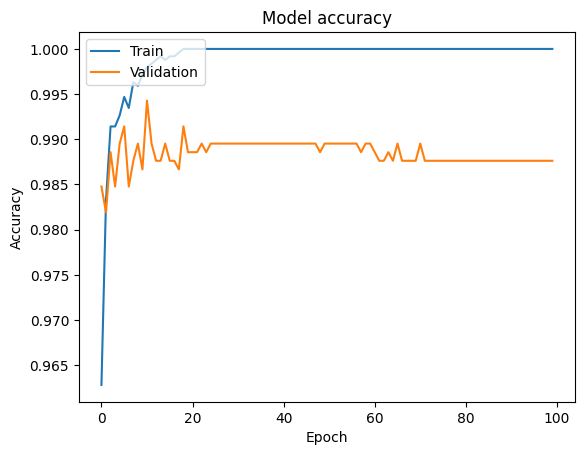

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

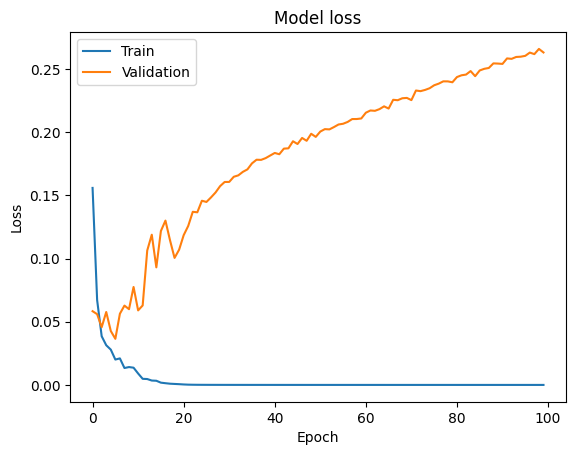

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()